In [1]:
using DSP
using PyPlot
using SAC

┌ Info: Recompiling stale cache file /home/marvh/.julia/compiled/v0.7/DSP/OtML7.ji for DSP [717857b8-e6f2-59f4-9121-6e50c889abd2]
└ @ Base loading.jl:1185
┌ Info: Recompiling stale cache file /home/marvh/.julia/compiled/v0.7/SAC/Y5rcP.ji for SAC [efca3a79-a021-5bb4-b6cf-8c9de39e1246]
└ @ Base loading.jl:1185


In [3]:
dat = SAC.read_wild("Lahar-2018-07-150*.sac")

┌ Info: SAC.read: './Lahar-2018-07-1501.sac'
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/io.jl:161
┌ Info: Data are little-endian; byteswapping
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/types.jl:78
┌ Info: SAC.read: './Lahar-2018-07-1502.sac'
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/io.jl:161
┌ Info: Data are little-endian; byteswapping
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/types.jl:78
┌ Info: SAC.read: './Lahar-2018-07-1503.sac'
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/io.jl:161
┌ Info: Data are little-endian; byteswapping
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/types.jl:78
┌ Info: SAC.read: './Lahar-2018-07-1504.sac'
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/io.jl:161
┌ Info: Data are little-endian; byteswapping
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/types.jl:78


(SACtr[SAC.SACtr(delta=0.005, b=0.0, npts=1967745, kstnm=c0AVX   ), SAC.SACtr(delta=0.01, b=0.0, npts=1080000, kstnm=R9C82   ), SAC.SACtr(delta=0.01, b=0.0, npts=1080000, kstnm=MNGR    ), SAC.SACtr(delta=0.01, b=0.0, npts=1077315, kstnm=MNGR    )], ["./Lahar-2018-07-1501.sac", "./Lahar-2018-07-1502.sac", "./Lahar-2018-07-1503.sac", "./Lahar-2018-07-1504.sac"])

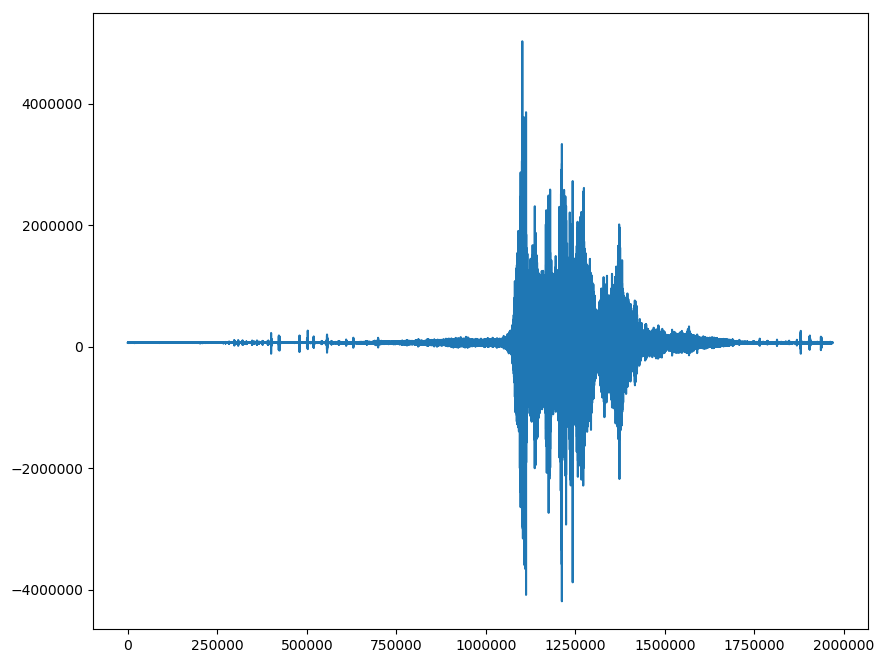

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f80b2ba6eb8>

In [7]:
fig = figure(figsize=(10,8))
plot(dat[1][1].t)

In [75]:
respon = Highpass(0.2,fs=100)
desig = Butterworth(4)
CuFil = filt(digitalfilter(respon,desig),cube[1][1].t);
CuMt = welch_pgram(CuFil,fs=100,2048);

In [76]:
respon = Highpass(0.2,fs=100)
desig = Butterworth(4)
RasFil = filt(digitalfilter(respon,desig),dat[1][2].t);
RasMt = welch_pgram(RasFil,fs=100,2048);

In [77]:
respon = Highpass(0.2,fs=100)
desig = Butterworth(4)
ResFil = filt(digitalfilter(respon,desig),dat[1][3].t);
ResMt = welch_pgram(ResFil,fs=100,2048);

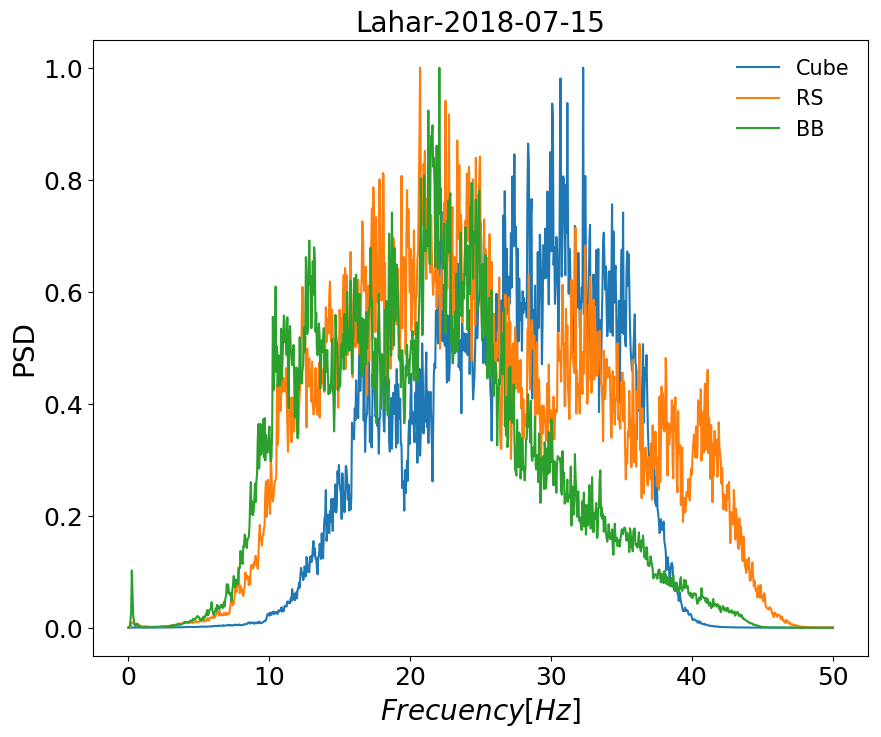

In [86]:
fig = figure(figsize=(10,8))
plot(CuMt.freq,CuMt.power/maximum(abs.(CuMt.power)),label="Cube")
plot(RasMt.freq,RasMt.power/maximum(abs.(RasMt.power)),label="RS")
plot(ResMt.freq,ResMt.power/maximum(abs.(ResMt.power)),label="BB")
ylabel("PSD",fontsize=20)
title("Lahar-2018-07-15",fontsize=20)
xlabel(L"Frecuency [Hz]",fontsize=20)
#legend(loc="best")
legend(loc="best",fontsize=15,frameon=false);
yticks(fontsize=18);
xticks(fontsize=18);
savefig("Lahar2018-07-15ZAll.png",dpi=450,format="PNG")

In [15]:
respon = Bandpass(0.5,49,fs=200)
desig = Butterworth(4)
RasFil = filt(digitalfilter(respon,desig),dat[1][2].t);
RasMt = welch_pgram(RasFil,fs=200,2048);

# Data with the same sampling_rate, BB and Cube

In [29]:
cube = SAC.read_wild("Cube2018-07-15-Trim100Hz0*.sac")b

┌ Info: SAC.read: './Cube2018-07-15-Trim100Hz01.sac'
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/io.jl:161
┌ Info: Data are little-endian; byteswapping
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/types.jl:78
┌ Info: SAC.read: './Cube2018-07-15-Trim100Hz02.sac'
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/io.jl:161
┌ Info: Data are little-endian; byteswapping
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/types.jl:78
┌ Info: SAC.read: './Cube2018-07-15-Trim100Hz03.sac'
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/io.jl:161
┌ Info: Data are little-endian; byteswapping
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/types.jl:78


(SACtr[SAC.SACtr(delta=0.01, b=0.0, npts=983873, kstnm=c0AVX   ), SAC.SACtr(delta=0.01, b=0.0, npts=983873, kstnm=c0AVX   ), SAC.SACtr(delta=0.01, b=0.0, npts=983873, kstnm=c0AVX   )], ["./Cube2018-07-15-Trim100Hz01.sac", "./Cube2018-07-15-Trim100Hz02.sac", "./Cube2018-07-15-Trim100Hz03.sac"])

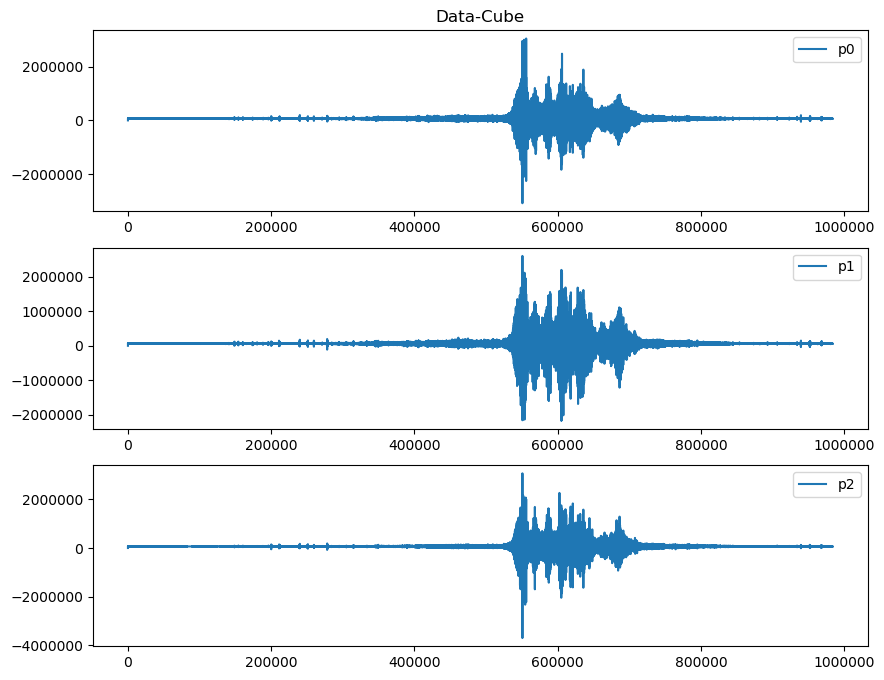

PyObject <matplotlib.legend.Legend object at 0x7f80b247c940>

In [53]:
fig = figure(figsize=(10,8))
subplot(3,1,1)
plot(cube[1][3].t,label=cube[1][1].kcmpnm[1:2])
legend(loc="best")
title("Data-Cube")
subplot(3,1,2)
plot(cube[1][2].t,label=cube[1][2].kcmpnm[1:2])
legend(loc="best")
subplot(3,1,3)
plot(cube[1][1].t,label=cube[1][3].kcmpnm[1:2])
legend(loc="best")

In [79]:
respon = Highpass(0.2,fs=100)
desig = Butterworth(4)
cubeFilZ = filt(digitalfilter(respon,desig),cube[1][1].t);
cubeFilN = filt(digitalfilter(respon,desig),cube[1][2].t);
cubeFilE = filt(digitalfilter(respon,desig),cube[1][3].t);

In [80]:
CuZMt = welch_pgram(cubeFilZ,fs=100,2048);
CuNMt = welch_pgram(cubeFilN,fs=100,2048);
CuEMt = welch_pgram(cubeFilE,fs=100,2048);

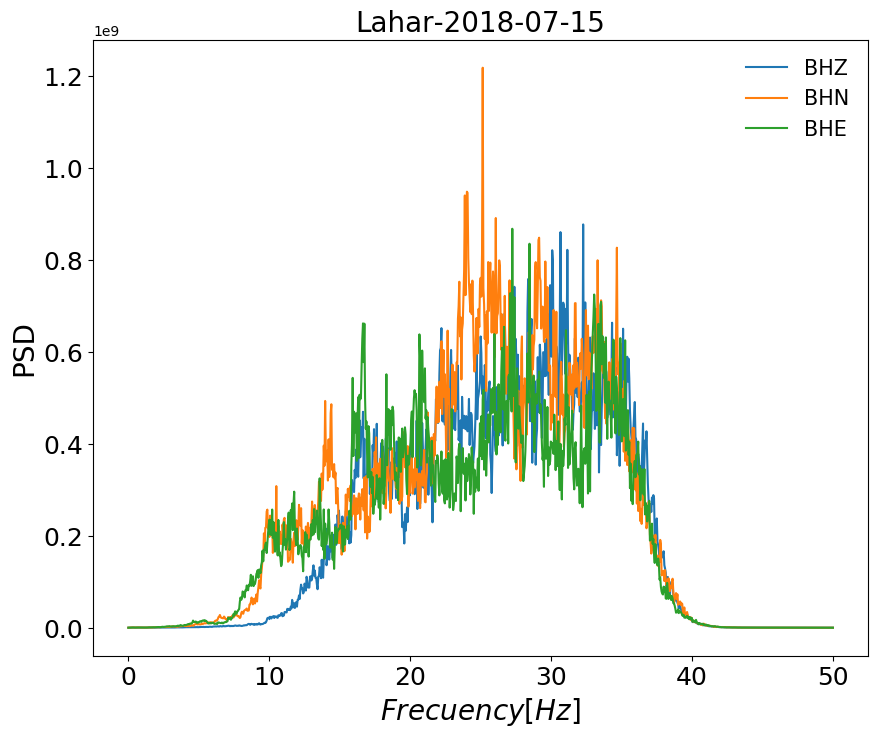

In [81]:
fig = figure(figsize=(10,8))
plot(CuZMt.freq,CuZMt.power,label="BHZ")
plot(CuNMt.freq,CuNMt.power,label="BHN")
plot(CuEMt.freq,CuEMt.power,label="BHE")
ylabel("PSD",fontsize=20)
title("Lahar-2018-07-15",fontsize=20)
xlabel(L"Frecuency [Hz]",fontsize=20)
#legend(loc="best")
legend(loc="best",fontsize=15,frameon=false);
yticks(fontsize=18);
xticks(fontsize=18);
ticklabel_format(axis="y", style="sci",scilimits=(0,0))

In [33]:
bb = SAC.read_wild("UC.MNGR.20180715-Trim0*.sac")

┌ Info: SAC.read: './UC.MNGR.20180715-Trim01.sac'
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/io.jl:161
┌ Info: Data are little-endian; byteswapping
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/types.jl:78
┌ Info: SAC.read: './UC.MNGR.20180715-Trim02.sac'
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/io.jl:161
┌ Info: Data are little-endian; byteswapping
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/types.jl:78
┌ Info: SAC.read: './UC.MNGR.20180715-Trim03.sac'
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/io.jl:161
┌ Info: Data are little-endian; byteswapping
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/types.jl:78
┌ Info: SAC.read: './UC.MNGR.20180715-Trim04.sac'
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/io.jl:161
┌ Info: Data are little-endian; byteswapping
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/types.jl:78


(SACtr[SAC.SACtr(delta=0.01, b=0.0, npts=1080000, kstnm=MNGR    ), SAC.SACtr(delta=0.01, b=0.0, npts=1077315, kstnm=MNGR    ), SAC.SACtr(delta=0.01, b=0.0, npts=1080000, kstnm=MNGR    ), SAC.SACtr(delta=0.01, b=0.0, npts=1080000, kstnm=MNGR    )], ["./UC.MNGR.20180715-Trim01.sac", "./UC.MNGR.20180715-Trim02.sac", "./UC.MNGR.20180715-Trim03.sac", "./UC.MNGR.20180715-Trim04.sac"])

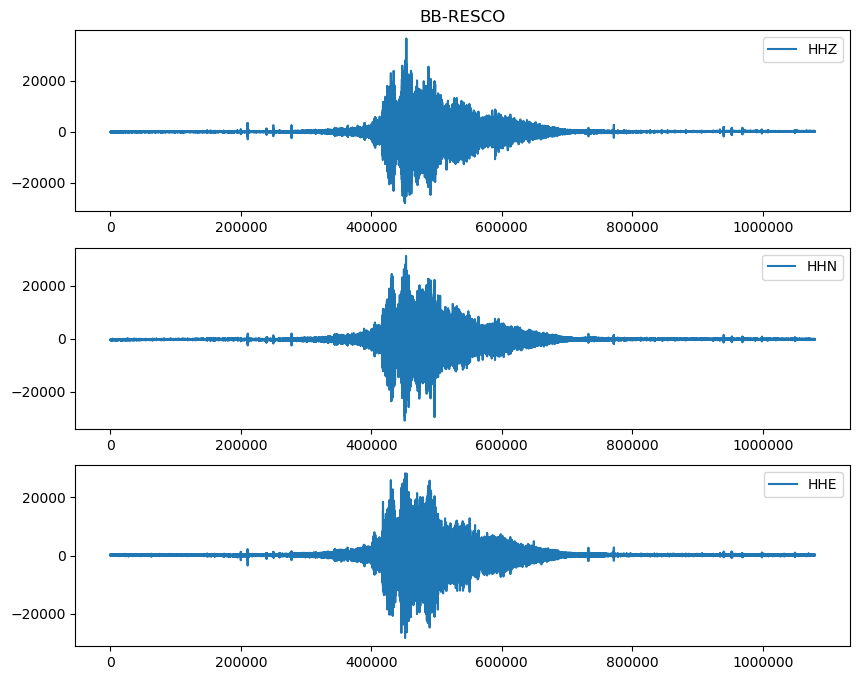

PyObject <matplotlib.legend.Legend object at 0x7f80ac5c10f0>

In [56]:
fig = figure(figsize=(10,8))
subplot(3,1,1)
plot(bb[1][4].t,label=bb[1][4].kcmpnm[1:3])
legend(loc="best")
title("BB-RESCO")
subplot(3,1,2)
plot(bb[1][1].t,label=bb[1][1].kcmpnm[1:3])
legend(loc="best")
subplot(3,1,3)
plot(bb[1][3].t,label=bb[1][3].kcmpnm[1:3])
legend(loc="best")

In [82]:
respon = Highpass(0.2,fs=100)
desig = Butterworth(4)
bbFilZ = filt(digitalfilter(respon,desig),bb[1][4].t);
bbFilN = filt(digitalfilter(respon,desig),bb[1][1].t);
bbFilE = filt(digitalfilter(respon,desig),bb[1][3].t);

In [83]:
bbZMt = welch_pgram(bbFilZ,fs=100,2048);
bbNMt = welch_pgram(bbFilN,fs=100,2048);
bbEMt = welch_pgram(bbFilE,fs=100,2048);

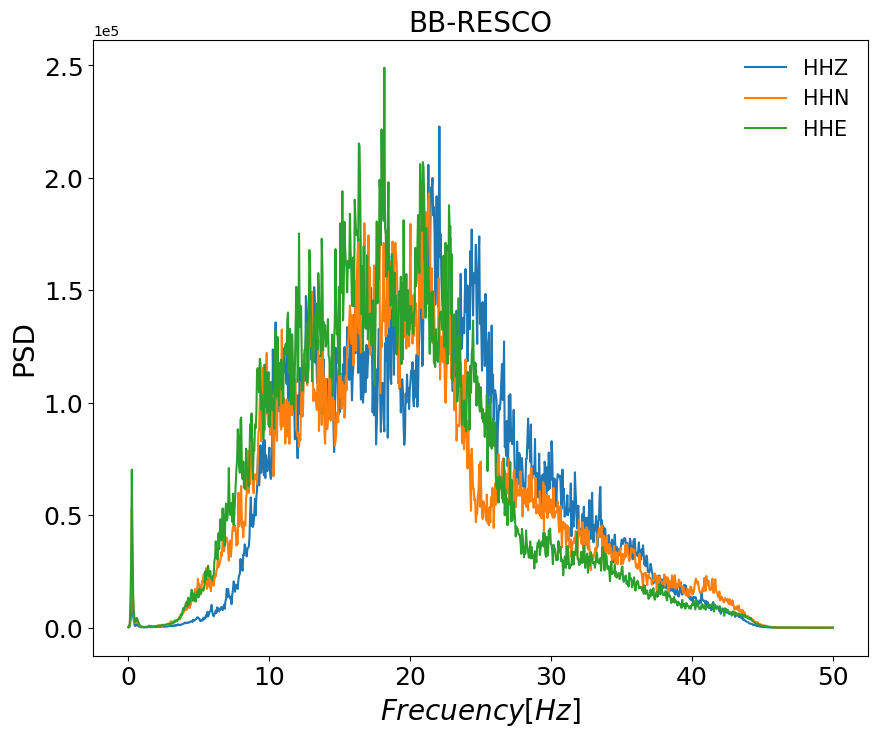

In [84]:
fig = figure(figsize=(10,8))
plot(bbZMt.freq,bbZMt.power,label=bb[1][4].kcmpnm[1:3])
plot(bbNMt.freq,bbNMt.power,label=bb[1][1].kcmpnm[1:3])
plot(bbEMt.freq,bbEMt.power,label=bb[1][3].kcmpnm[1:3])
ylabel("PSD",fontsize=20)
title("BB-RESCO",fontsize=20)
xlabel(L"Frecuency [Hz]",fontsize=20)
#legend(loc="best")
legend(loc="best",fontsize=15,frameon=false);
yticks(fontsize=18);
xticks(fontsize=18);
ticklabel_format(axis="y", style="sci",scilimits=(0,0))

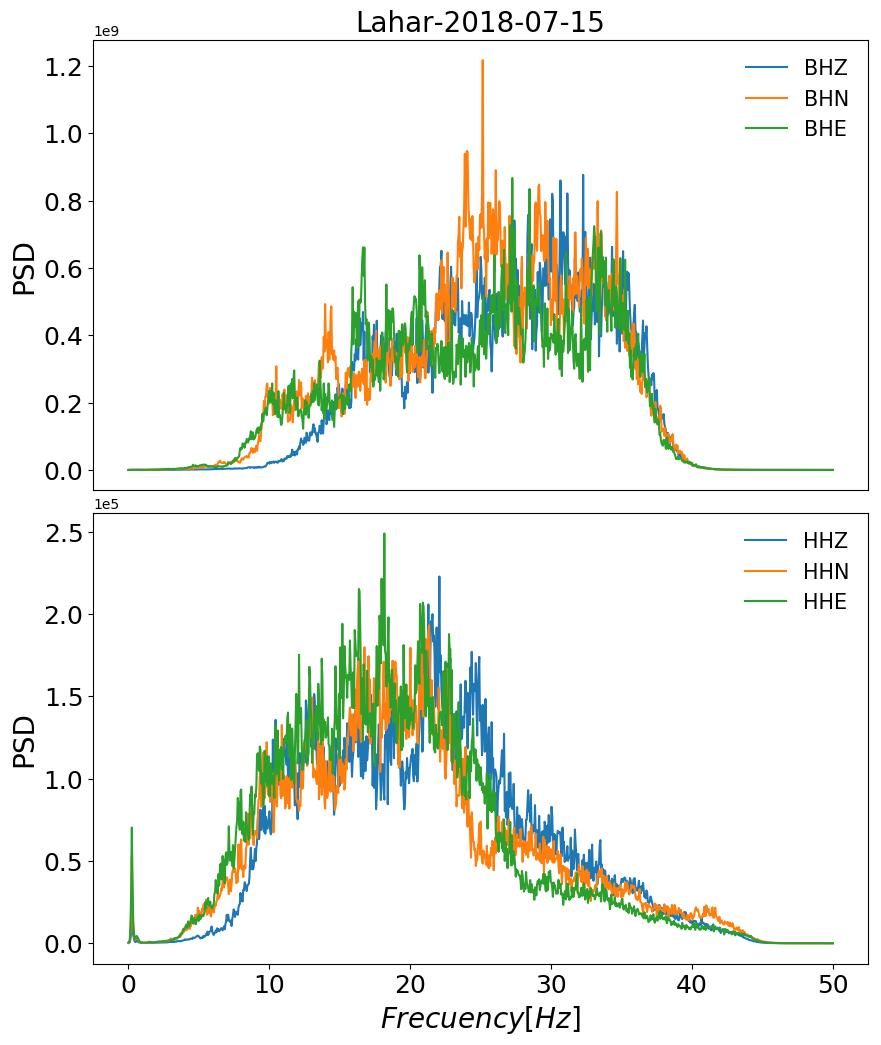

In [85]:
fig = figure(figsize=(10,12))
subplots_adjust(hspace=0.05)
subplot(2,1,1)
plot(CuZMt.freq,CuZMt.power,label="BHZ")
plot(CuNMt.freq,CuNMt.power,label="BHN")
plot(CuEMt.freq,CuEMt.power,label="BHE")
ylabel("PSD",fontsize=20)
title("Lahar-2018-07-15",fontsize=20)
#xlabel(L"Frecuency [Hz]",fontsize=20)
#legend(loc="best")
legend(loc="best",fontsize=15,frameon=false);
yticks(fontsize=18);
xticks(fontsize=18,[]);
ticklabel_format(axis="y", style="sci",scilimits=(0,0))

subplot(2,1,2)
plot(bbZMt.freq,bbZMt.power,label=bb[1][4].kcmpnm[1:3])
plot(bbNMt.freq,bbNMt.power,label=bb[1][1].kcmpnm[1:3])
plot(bbEMt.freq,bbEMt.power,label=bb[1][3].kcmpnm[1:3])
ylabel("PSD",fontsize=20)
#title("BB-RESCO",fontsize=20)
xlabel(L"Frecuency [Hz]",fontsize=20)
#legend(loc="best")
legend(loc="best",fontsize=15,frameon=false);
yticks(fontsize=18);
xticks(fontsize=18);
ticklabel_format(axis="y", style="sci",scilimits=(0,0))

savefig("Lahar2018-07-15.png",dpi=450,format="PNG")